In [142]:
import hyperspy.api as hs
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

In [49]:
file_names = ['EDS Data 4.rpl', 'EDS Data 4.rpl']

In [79]:
## load data as list of HS Signal1D and set all metadata
# TODO: need to incorporate metadata as lists of parameters for i/p.

s = [[] for i in file_names]

for i in range(0,len(file_names)):
    s[i] = hs.load(file_names[i])
    s[i] = s[i].T
    s[i].axes_manager[0].set(scale = 1., offset = 0., units = 'px', name = 'x')
    s[i].axes_manager[1].set(scale = 1., offset = 0., units = 'px', name = 'y')
    s[i].axes_manager[2].set(scale = 0.005, offset = -0.1, units = 'keV', name = 'energy')
    s[i].metadata.General.title = 'EDX Spectrum'
    s[i].metadata.set_item("Acquisition_parameters.microscope_name", 'KCL F200')
    s[i].metadata.set_item("Acquisition_parameters.probe_current", 1)
    s[i].metadata.set_item("Acquisition_parameters.pixel_size", 1)
    s[i].metadata.set_item("Acquisition_parameters.dwell_time", 1)
    s[i].metadata.set_item("Acquisition_parameters.live_time", 1)
    s[i].metadata.set_item("Beam_energy", 200)

C:\Users\Alex\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: use "HasTraits.trait_set" instead
  
C:\Users\Alex\anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: use "HasTraits.trait_set" instead
  if __name__ == '__main__':
C:\Users\Alex\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: use "HasTraits.trait_set" instead
  # Remove the CWD from sys.path while we load stuff.


<IPython.core.display.Javascript object>


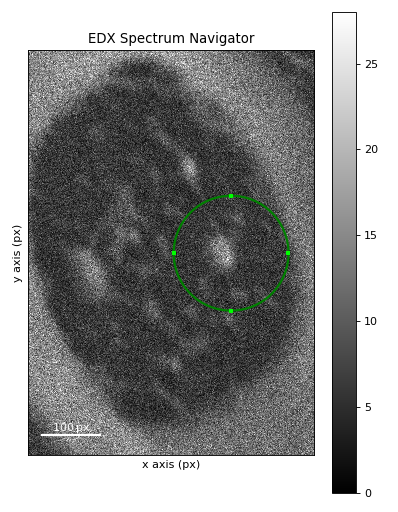

<IPython.core.display.Javascript object>


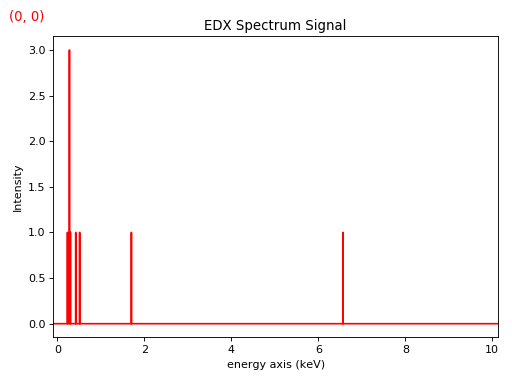

<IPython.core.display.Javascript object>


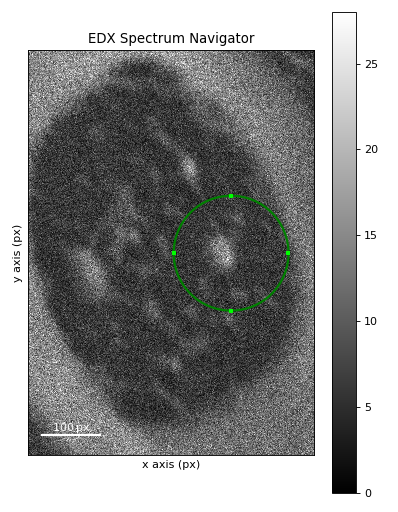

<IPython.core.display.Javascript object>


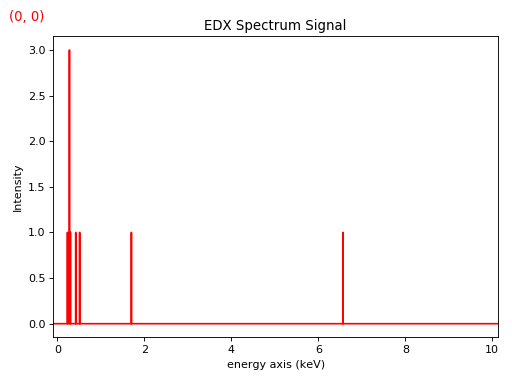

In [159]:
## select interesting bit of data.
# TODO: rewrite this to mask and binarize - the interactive widget sucks. 
# TODO: convert s[i].isig[:] to images, and ROI/mask those --> why no option to turn off plotting signal??

roi = [[] for i in file_names]
s_roi = [[] for i in file_names]

for i in range(0,len(file_names)):
    roi[i] = hs.roi.CircleROI(len(s[i].inav[0])/2, len(s[i].inav[1])/2, 100, r_inner=False)
    s[i].plot()
    s_roi[i] = roi[i].interactive(s[i])


In [160]:
## Sum spectra and set signal type;

s_roi_summed = [[] for i in file_names]
raw_counts_summed = [[] for i in file_names]

for i in range(0,len(file_names)):
    s_roi_summed[i] = s_roi[i].sum()
    s_roi_summed[i].set_signal_type("EDS_TEM")
    s_roi_summed[i].set_elements(['Na', 'K'])
    s_roi_summed[i].set_lines([])
    
    raw_counts_summed[i] = s_roi_summed[i].data.data

<IPython.core.display.Javascript object>


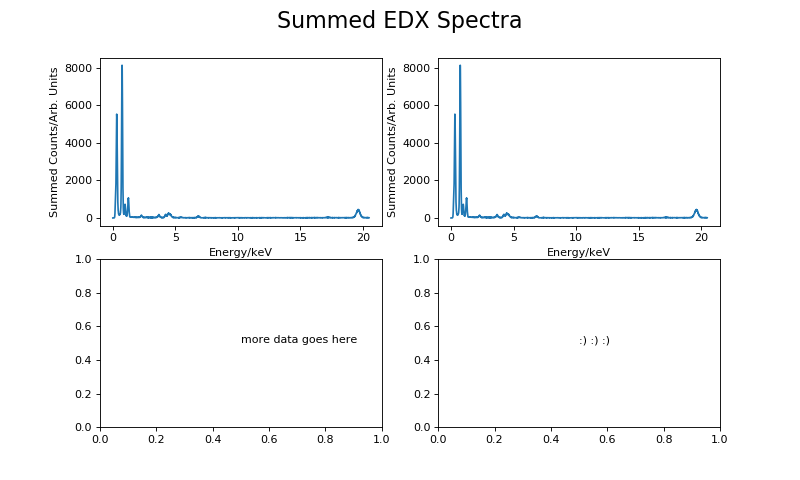

In [197]:
## Plotting summed spectra nicely using pyplot:
# TODO: generalise figure size for arb. number of plots. 

fig, ax = plt.subplots(2,2, figsize=(10, 6))
fig.suptitle('Summed EDX Spectra', fontsize=20)

for i in range(0,len(file_names)):
    plt.subplot(2,2,i+1)
    plt.plot(np.linspace(0,2048,2048)*0.01, raw_counts_summed[i])
    plt.xlabel('Energy/keV')
    plt.ylabel('Summed Counts/Arb. Units')
    
plt.subplot(2,2,3).text(0.5, 0.5, 'more data goes here')
plt.subplot(2,2,4).text(0.5, 0.5, ':) :) :)')


plt.show()

In [188]:
a = s_roi_summed[0].get_lines_intensity()
a[0].data

array([2014.])

In [191]:
a[0].metadata

├── Acquisition_instrument
│   └── TEM
│       ├── Detector
│       │   └── EDS
│       │       ├── azimuth_angle = 0.0
│       │       ├── elevation_angle = 35.0
│       │       └── energy_resolution_MnKa = 130.0
│       └── Stage
│           └── tilt_alpha = 0.0
├── Acquisition_parameters
│   ├── dwell_time = 1
│   ├── live_time = 1
│   ├── microscope_name = KCL F200
│   ├── pixel_size = 1
│   └── probe_current = 1
├── General
│   ├── date = 
│   ├── original_filename = EDS Data 4.rpl
│   ├── time = 
│   └── title = X-ray line intensity of EDX Spectrum: K_Ka at 3.31 keV
├── Sample
│   ├── elements = ['K']
│   └── xray_lines = ['K_Ka']
└── Signal
    ├── binned = True
    └── signal_type = EDS_TEM

<IPython.core.display.Javascript object>


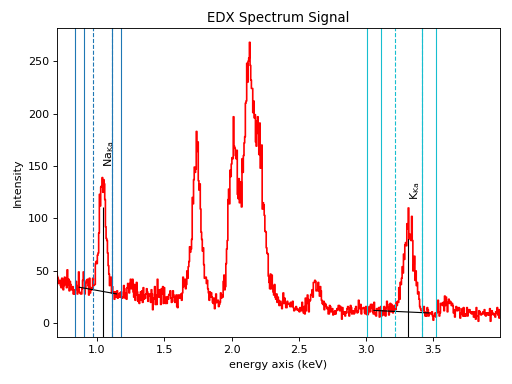

<IPython.core.display.Javascript object>


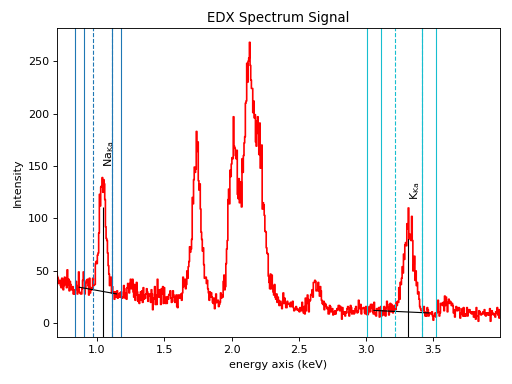

In [205]:
## Back to HS data - background subtraction & line integration. line_intensities contains all info for lines. 
# TODO: Again plotting not good - write in pyplot. 

line_intensities = [[] for i in file_names]
for i in range(0, len(file_names)):
    bw = s_roi_summed[i].estimate_background_windows(line_width=[2.0, 1.0])
    line_intensities[i] = s_roi_summed[i].get_lines_intensity(plot_result=False)
    s_roi_summed[i].isig[0.7:4.].plot(background_windows=bw, integration_windows='auto')

In [255]:
na_ka = []
k_ka = []

for i in range(0,len(line_intensities)):
    na_counts = line_intensities[i][0].data[0]
    na_ka.append(na_counts)
    k_counts = line_intensities[i][1].data[0]
    k_ka.append(k_counts)
    
sample = file_names

In [ ]:
## NEW SECTION FOR CROSS SECTIONS:

# GET LIST OF PX AREAS, LIVE TIMES, CURRENTS ETC. 
# CALCULATE CROSS SECTIONS FOR EACH LINE --> PULL FROM ANOTHER SCRIPT
# GET NUMBER OF ATOMS OF K AND NA FOR EACH SAMPLE.

## QUESTIONS FOR CHRISTINA:

## WHAT WOULD BE A GOOD WAY TO PRESENT THIS DATA? 
## WHAT ELSE IS USEFUL? 

## E.G:

In [302]:
## Import pandas and display counts for each file:
# TODO: use a more lightweight package. Pandas is overkill.

import pandas as pd

pd_format_data = [[a, b, c] for a, b, c in zip(sample, na_ka, k_ka)]

pd.DataFrame(pd_format_data, columns = ['Sample', 'Na K\u03B1', 'K K\u03B1']).style.hide_index().set_precision(1)



Sample,Na Kα,K Kα
EDS Data 4.rpl,2014.0,2230.0
EDS Data 4.rpl,2014.0,2230.0
